## Support Vector Machines

I SVC sono una classe di algoritmi supervisionati che possono essere utilizzati sia per problemi di regressione sia per problemi di classificazione.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


#Creazione di 100 punti divisi in due classi
X, y = make_blobs(n_samples=100, centers=2, random_state=6)



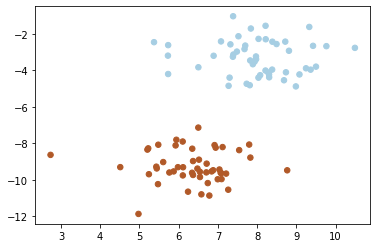

In [14]:
# c definisce i colori: A sequence of n numbers to be mapped to colors using cmap;
# s definisce la grandezza dei punti;
# cmap definisce la mappa di colori da utilizzare;

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

Supponiamo di avere dei dati strutturati in questo modo: o rossi o blu

Cosa possiamo dedurre da questo grafico?

1. Supponi di avere un punto di coordinate (8,-2), lo classificheresti come azzurro o come rosso?
2. Supponi di avere un punto di coordinate (7,-6), lo classificheresti come azzurro o come rosso?

Guardando il grafico possiamo dire che i dati sembrano essere *linearmente separabili* cioè 
possiamo tracciare una retta che divide il piano in due parti:
da una parte i *rossi* dall'altra i *blu*.

<div style="text-align: center; line-height: 0; padding-top: 2px;">
  <img src="./boundary.png">
</div>

DOMANDA:
1. Quante sono le rette che dividono i punti?
2. Come scegliamo la *migliore*?

### L'idea che sta alla base degli algoritmi di SVM è di trovare quella retta che massimizza la distanza dagli argini!

Per definire la retta che divide le due classi, l'SVM utilizza i punti che stanno ai bordi, chiamati **support vectors**. Il numero di punti che vengono utilizzati per definire gli argini dipende da come impostiamo il modello.

<div style="text-align: center; line-height: 0; padding-top: 2px;">
  <img src="./supportVector.png">
</div>

Se imponiamo che tutti i punti debbano stare fuori dai margini allora stiamo facendo una **hard margin classification**:
lati negativi:
1. Funziona solamente se i dati sono lineramente separabili;
2. E' molto sensibile agli outliers;

<div style="text-align: line-height: 0; padding-top: 2px;">
  <img src="./svm_with_c1.png">
</div>

Per avere un modello più flessibile si cerca di tenere i margini più ampi possibili e minimizzare i punti che finiscono nei bordi: **soft margin classification**

<div style="text-align: line-height: 0; padding-top: 2px;">
  <img src="./svm_with_c0.1.png">
</div>

In [15]:
# Facciamo il fit del modello: più C è alto più ci avviciniamo ad un hard margin classification
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
#clf.get_params()

SVC(C=1, kernel='linear')

Una volta fatto il fit del modello, possiamo farci restituire i support_vectors, all'aumentare di C il numero di support_vectors_ aumenta:

In [16]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 6.49868019, -7.13530714]])

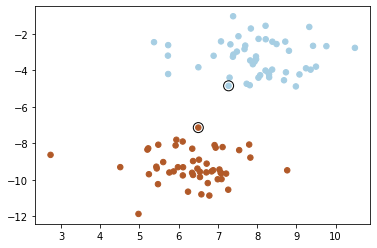

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


#Disegna i support vectors del modello:

plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

### Decision Function

In [20]:
X[1]

array([ 5.42916264, -9.28019465])

In [22]:
clf.decision_function([[7, -6]])

array([-0.02163606])

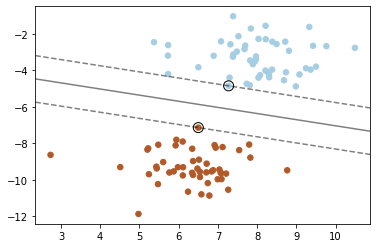

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Otteniamo gli estremi dei due assi:
ax = plt.gca() #Get axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Griglia di punti
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Fai il plot dei punti che hanno decision_function = -1, 0, 1
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.contour.html
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],  alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### L'iperparametro C

L'iperparametro che ci permette di regolarizzare il modello è C, se non specificato assume di default il valore 1. Se ci accorgiamo che il modello sta facendo overfitting allora si può regolarizzare diminuendo il valore di C. Al diminuire di C l'ampiezza degli argini e il numero di support vectors aumenta.

ESERCIZIO

Utilizzando il metodo make_blobs genera dei nuovi dati utilizzando il parametro cluster_std = [0.5, 2.5] e disegna il grafico della decision function per i valori -1,0,1 (come negli esempi precedenti), come variano i margini al crescere di cluster_std?
Genera la confusion_matrix per tutti i casi;

[soluzione](./soluzione/cluster_std.ipynb).
      

### Dati non linearmente separabili

In [ ]:
import random
import math
x = []
y = []
for i in range(0,50):
    x += [[random.uniform(-1,1),random.uniform(-1,1)]]
    y += [0]
for i in range(50,100):
    r_i = float(random.uniform(2,2.5))
    x_i = float(random.uniform(-3,3))
    y_i_2 = r_i**2 - x_i**2
    if y_i_2>=0:
        y_i = random.choice([-1,1])*math.sqrt(y_i_2)
        x += [[x_i,y_i]]
        y += [1]

In [ ]:
X = np.asarray(x).reshape(len(x),2)
y = np.asarray(y).reshape(len(y),1).ravel()

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.Paired)
plt.show()

In [ ]:
clf = svm.SVC(kernel='poly', degree=2, C=5 )
clf.fit(X, y)


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Otteniamo gli estremi dei due assi:
ax = plt.gca() #Get axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Griglia di punti
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Fai il plot dei punti che hanno decision_function = -1, 0, 1
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Similarity Features
### Gaussian Radial Basis Function 

#### Nell'esempio de MNIST abbiano utilizzato la classe SVC senza specificare nessun kernel...quale kernel ha usato???

Se non viene specificato un kernel allora di default viene usato il Gaussian Radial Basis Function (rbf).
Questo kernel si basa sul metodo delle similarity features, cioè aggiunge delle features in modo tale da separare linearmente i dati.
Supponiamo di avere due funzioni definite da due landmark (nel disegno i due landmark sono i punti -2 e 1):
la prima è una Gaussiana centrata in -2; la seconda è una Gaussiana centrata in 1
Ora per ogni punto del dataset viene calcolato il valore del punto rispetto alle due gaussiane:
* -2 -> (1 , 0.01)
* -4 -> (0.25 , 0)

una volta che i dati sono stati trasformati la feature X_1 non si considera più e si considerano invece le feature X_2 e X_3, rispetto a queste due features i dati risultano essere linearmente separabili!

<div style="text-align: center; line-height: 0; padding-top: 2px;">
  <img src="./gaussianRBF.png">
</div>

DOMANDA:
    1. il punto 4 del grafico di sinistra in quale punto viene mappato nel grafico a destra?
    2. il punto 1 del grafico di sinistra in quale punto viene mappato nel grafico a destra?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


#Creazione di 100 punti divisi in due classi
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std = 2)

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.Paired)

In [ ]:
#Default: kernel='rbf'
clf = svm.SVC()
clf.fit(X, y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Otteniamo gli estremi dei due assi:
ax = plt.gca() #Get axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Griglia di punti
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Fai il plot dei punti che hanno decision_function = -1, 0, 1
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Quando si usa come classificatore l'SVC con kernel = 'rbf' per regolarizzare il modello si può giocare sia su C che su gamma. Gamma è il parametro che fa variare l'ampiezza della curva gaussiana
1. se gamma è alto allora le gaussiane saranno schiacciate;
2. se gamma è piccolo allora le code saranno più ampie;

## ESERCIZIO:
Genera dei dati usando make_blobs(n_samples=100, centers=2, random_state=6, cluster_std = 2, n_features = 2):

fai il training del SVC usando un kernel rbf e scegliendo gamma = [1, 10, 100] e C = 1

[soluzione](./soluzione/kernelRBF.ipynb)
